# LUNG CANCER PREDICTION

In [1]:
#importing modules
import pandas as pd #data manipulation and analysis
import numpy as np #numercial python, arrays
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset using pandas dataframe
df=pd.read_csv('/content/survey lung cancer (1).csv')

### DATA PREPROCESSING

In [3]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
df.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [5]:
df.shape
print('Rows:',df.shape[0])
print('Colums:',df.shape[1])

Rows: 309
Colums: 16


In [6]:
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [7]:
df.size

4944

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [9]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [10]:
# Check for missing values
missing_values = df.isnull().sum()

print(missing_values)

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [11]:
# Calculate category-wise frequency of lung cancer
lung_cancer_counts = df['LUNG_CANCER'].value_counts()

print(lung_cancer_counts)

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64


### Convert Categorical value to Numeral value

In [12]:
#gender, lung cancer are categorical values
colum_cat = ['GENDER','LUNG_CANCER']
for i in colum_cat:
    print('-------------------------')
    print(df[i].value_counts())
    print('-------------------------')

-------------------------
M    162
F    147
Name: GENDER, dtype: int64
-------------------------
-------------------------
YES    270
NO      39
Name: LUNG_CANCER, dtype: int64
-------------------------


In [13]:
df_clean = df.copy()
for i in colum_cat:
    print(f'Category of {i}')
    catlist = df_clean[i].unique()
    for j, val in enumerate(catlist):
         dftobjfinal = df_clean[i].replace({val:j},inplace=True)
         #print(dftobjfinal)
         print(j,val)
    print('--------------------------------')

Category of GENDER
0 M
1 F
--------------------------------
Category of LUNG_CANCER
0 YES
1 NO
--------------------------------


In [14]:
df_clean

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,0
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,0
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,56,1,1,1,2,2,2,1,1,2,2,2,2,1,0
305,0,70,2,1,1,1,1,2,2,2,2,2,2,1,2,0
306,0,58,2,1,1,1,1,1,2,2,2,2,1,1,2,0
307,0,67,2,1,2,1,1,2,2,1,2,2,2,1,2,0


In [15]:
# Exclude specified columns from count
exclude_columns = ['AGE', 'LUNG_CANCER', 'GENDER']
count_columns = [col for col in df.columns if col not in exclude_columns]

# Count of values in each column
column_counts = {}

for column in count_columns:
    column_counts[column] = df[column].value_counts()

print(column_counts)

{'SMOKING': 2    174
1    135
Name: SMOKING, dtype: int64, 'YELLOW_FINGERS': 2    176
1    133
Name: YELLOW_FINGERS, dtype: int64, 'ANXIETY': 1    155
2    154
Name: ANXIETY, dtype: int64, 'PEER_PRESSURE': 2    155
1    154
Name: PEER_PRESSURE, dtype: int64, 'CHRONIC DISEASE': 2    156
1    153
Name: CHRONIC DISEASE, dtype: int64, 'FATIGUE ': 2    208
1    101
Name: FATIGUE , dtype: int64, 'ALLERGY ': 2    172
1    137
Name: ALLERGY , dtype: int64, 'WHEEZING': 2    172
1    137
Name: WHEEZING, dtype: int64, 'ALCOHOL CONSUMING': 2    172
1    137
Name: ALCOHOL CONSUMING, dtype: int64, 'COUGHING': 2    179
1    130
Name: COUGHING, dtype: int64, 'SHORTNESS OF BREATH': 2    198
1    111
Name: SHORTNESS OF BREATH, dtype: int64, 'SWALLOWING DIFFICULTY': 1    164
2    145
Name: SWALLOWING DIFFICULTY, dtype: int64, 'CHEST PAIN': 2    172
1    137
Name: CHEST PAIN, dtype: int64}


### DATA VISUALIZATION

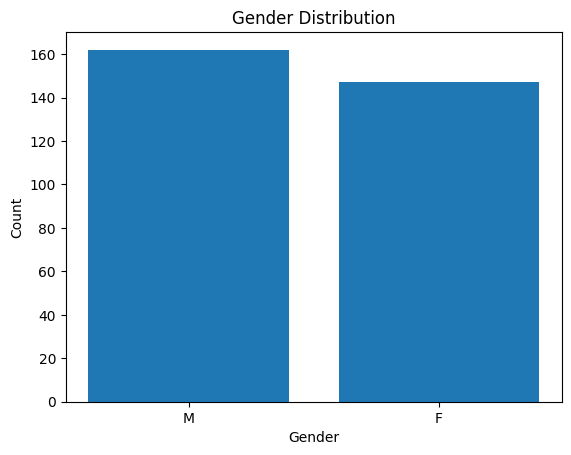

In [16]:
# Bar Chart - Gender Distribution
gender_counts = df['GENDER'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

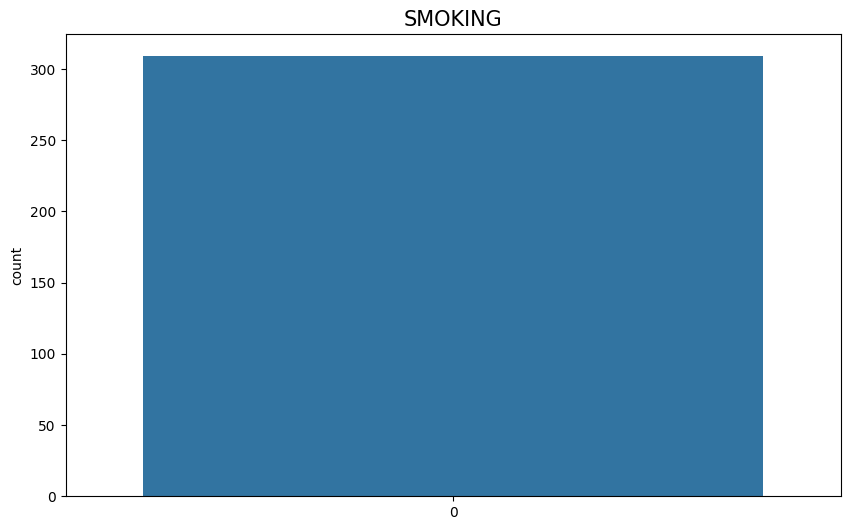

In [17]:
#count of smoking
plt.figure(figsize=(10,6))
sns.countplot(df["SMOKING"])
plt.title("SMOKING", size=15)
plt.show()

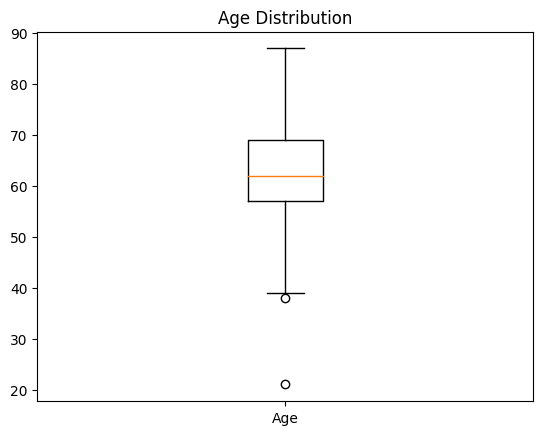

In [18]:
# Box Plot - Age Distribution
plt.boxplot(df['AGE'], labels=['Age'])
plt.title('Age Distribution')
plt.show()

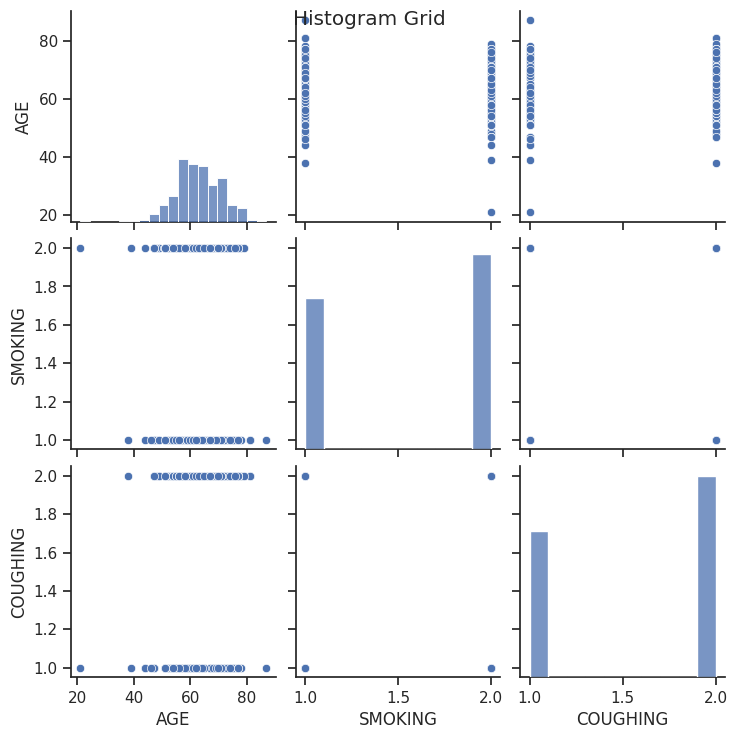

In [19]:
# Select numerical columns for visualization
num_cols = ['AGE', 'SMOKING', 'COUGHING',]

# Create a histogram grid
sns.set(style="ticks")
sns.pairplot(df, vars=num_cols, diag_kind='hist')
plt.suptitle('Histogram Grid')
plt.show()

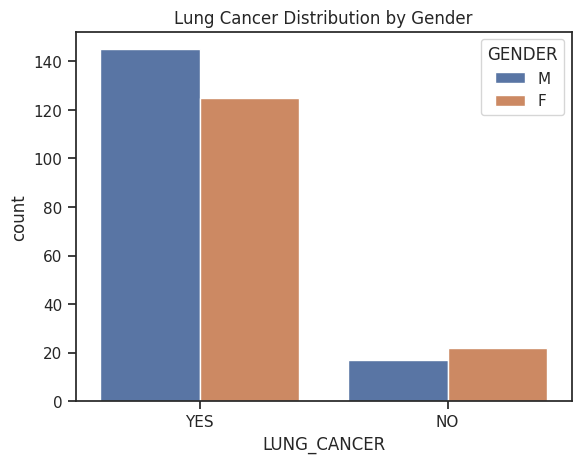

In [20]:
# Bar plot of Lung Cancer, with hue for Gender
sns.countplot(data=df, x='LUNG_CANCER', hue='GENDER')
plt.title('Lung Cancer Distribution by Gender')
plt.show()

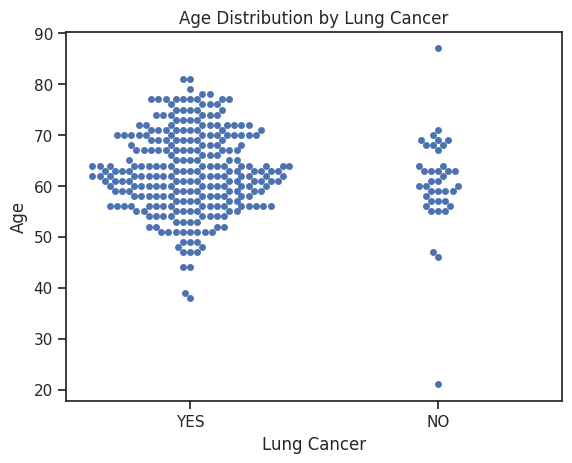

In [21]:
# Swarm plot of Age by Lung Cancer status
sns.swarmplot(data=df, x='LUNG_CANCER', y='AGE')
plt.xlabel('Lung Cancer')
plt.ylabel('Age')
plt.title('Age Distribution by Lung Cancer')
plt.show()

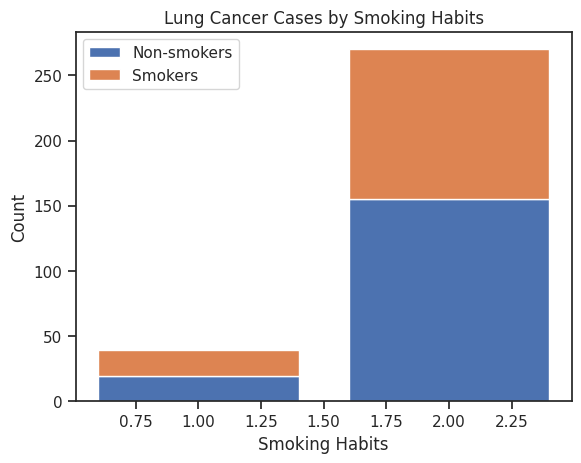

In [22]:
# Stacked Bar Chart - Smoking Habits
smoking_counts = df['SMOKING'].value_counts()
non_smokers = df[df['SMOKING'] == 2]['LUNG_CANCER'].value_counts()
smokers = df[df['SMOKING'] == 1]['LUNG_CANCER'].value_counts()

fig, ax = plt.subplots()
ax.bar(smoking_counts.index, non_smokers, label='Non-smokers')
ax.bar(smoking_counts.index, smokers, bottom=non_smokers, label='Smokers')
ax.set_xlabel('Smoking Habits')
ax.set_ylabel('Count')
ax.set_title('Lung Cancer Cases by Smoking Habits')
ax.legend()
plt.show()

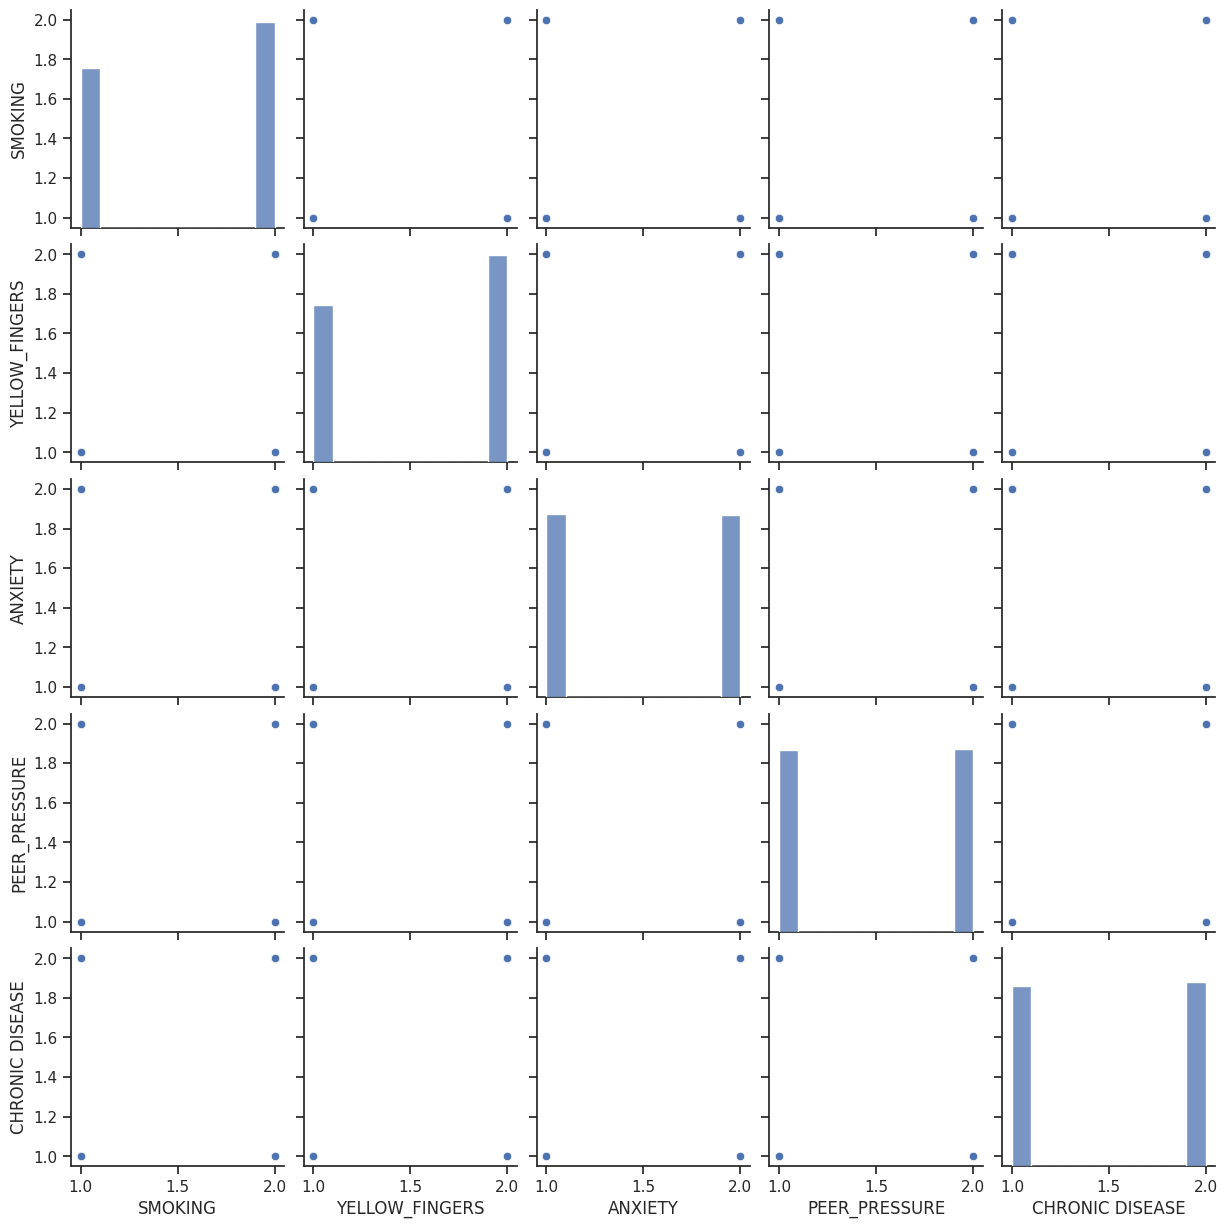

In [23]:
# Pair plot of selected columns
selected_columns = ['SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC DISEASE']
sns.pairplot(data=df[selected_columns])
plt.show()

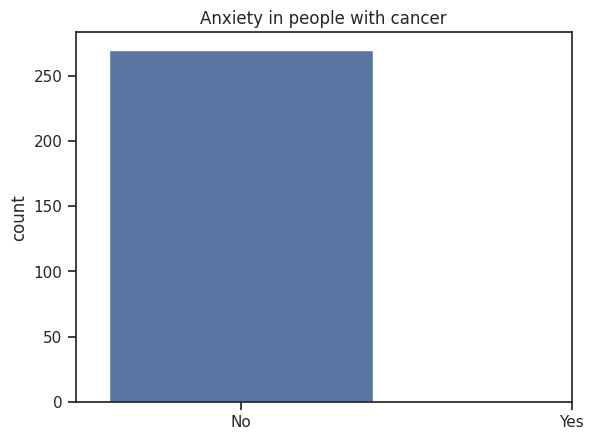

YES = 142
NO = 128


In [24]:
#Anxiety in peoplwe with cancer
df_lung_cancer = df[df["LUNG_CANCER"]=='YES']
sns.countplot(df_lung_cancer["ANXIETY"])
plt.title("Anxiety in people with cancer")
plt.xticks([0, 1], ('No', 'Yes'))
plt.show()
print("YES = 142")
print("NO = 128")

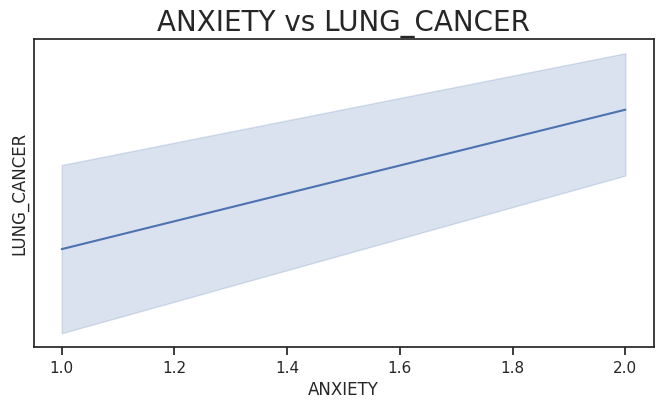

In [25]:
plt.figure(figsize=(8,4))
sns.lineplot(x=df["ANXIETY"], y=df["LUNG_CANCER"])
plt.title("ANXIETY vs LUNG_CANCER", size=20)
plt.show()

<ipython-input-26-badb1bddf739>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap='RdBu', ax=ax)


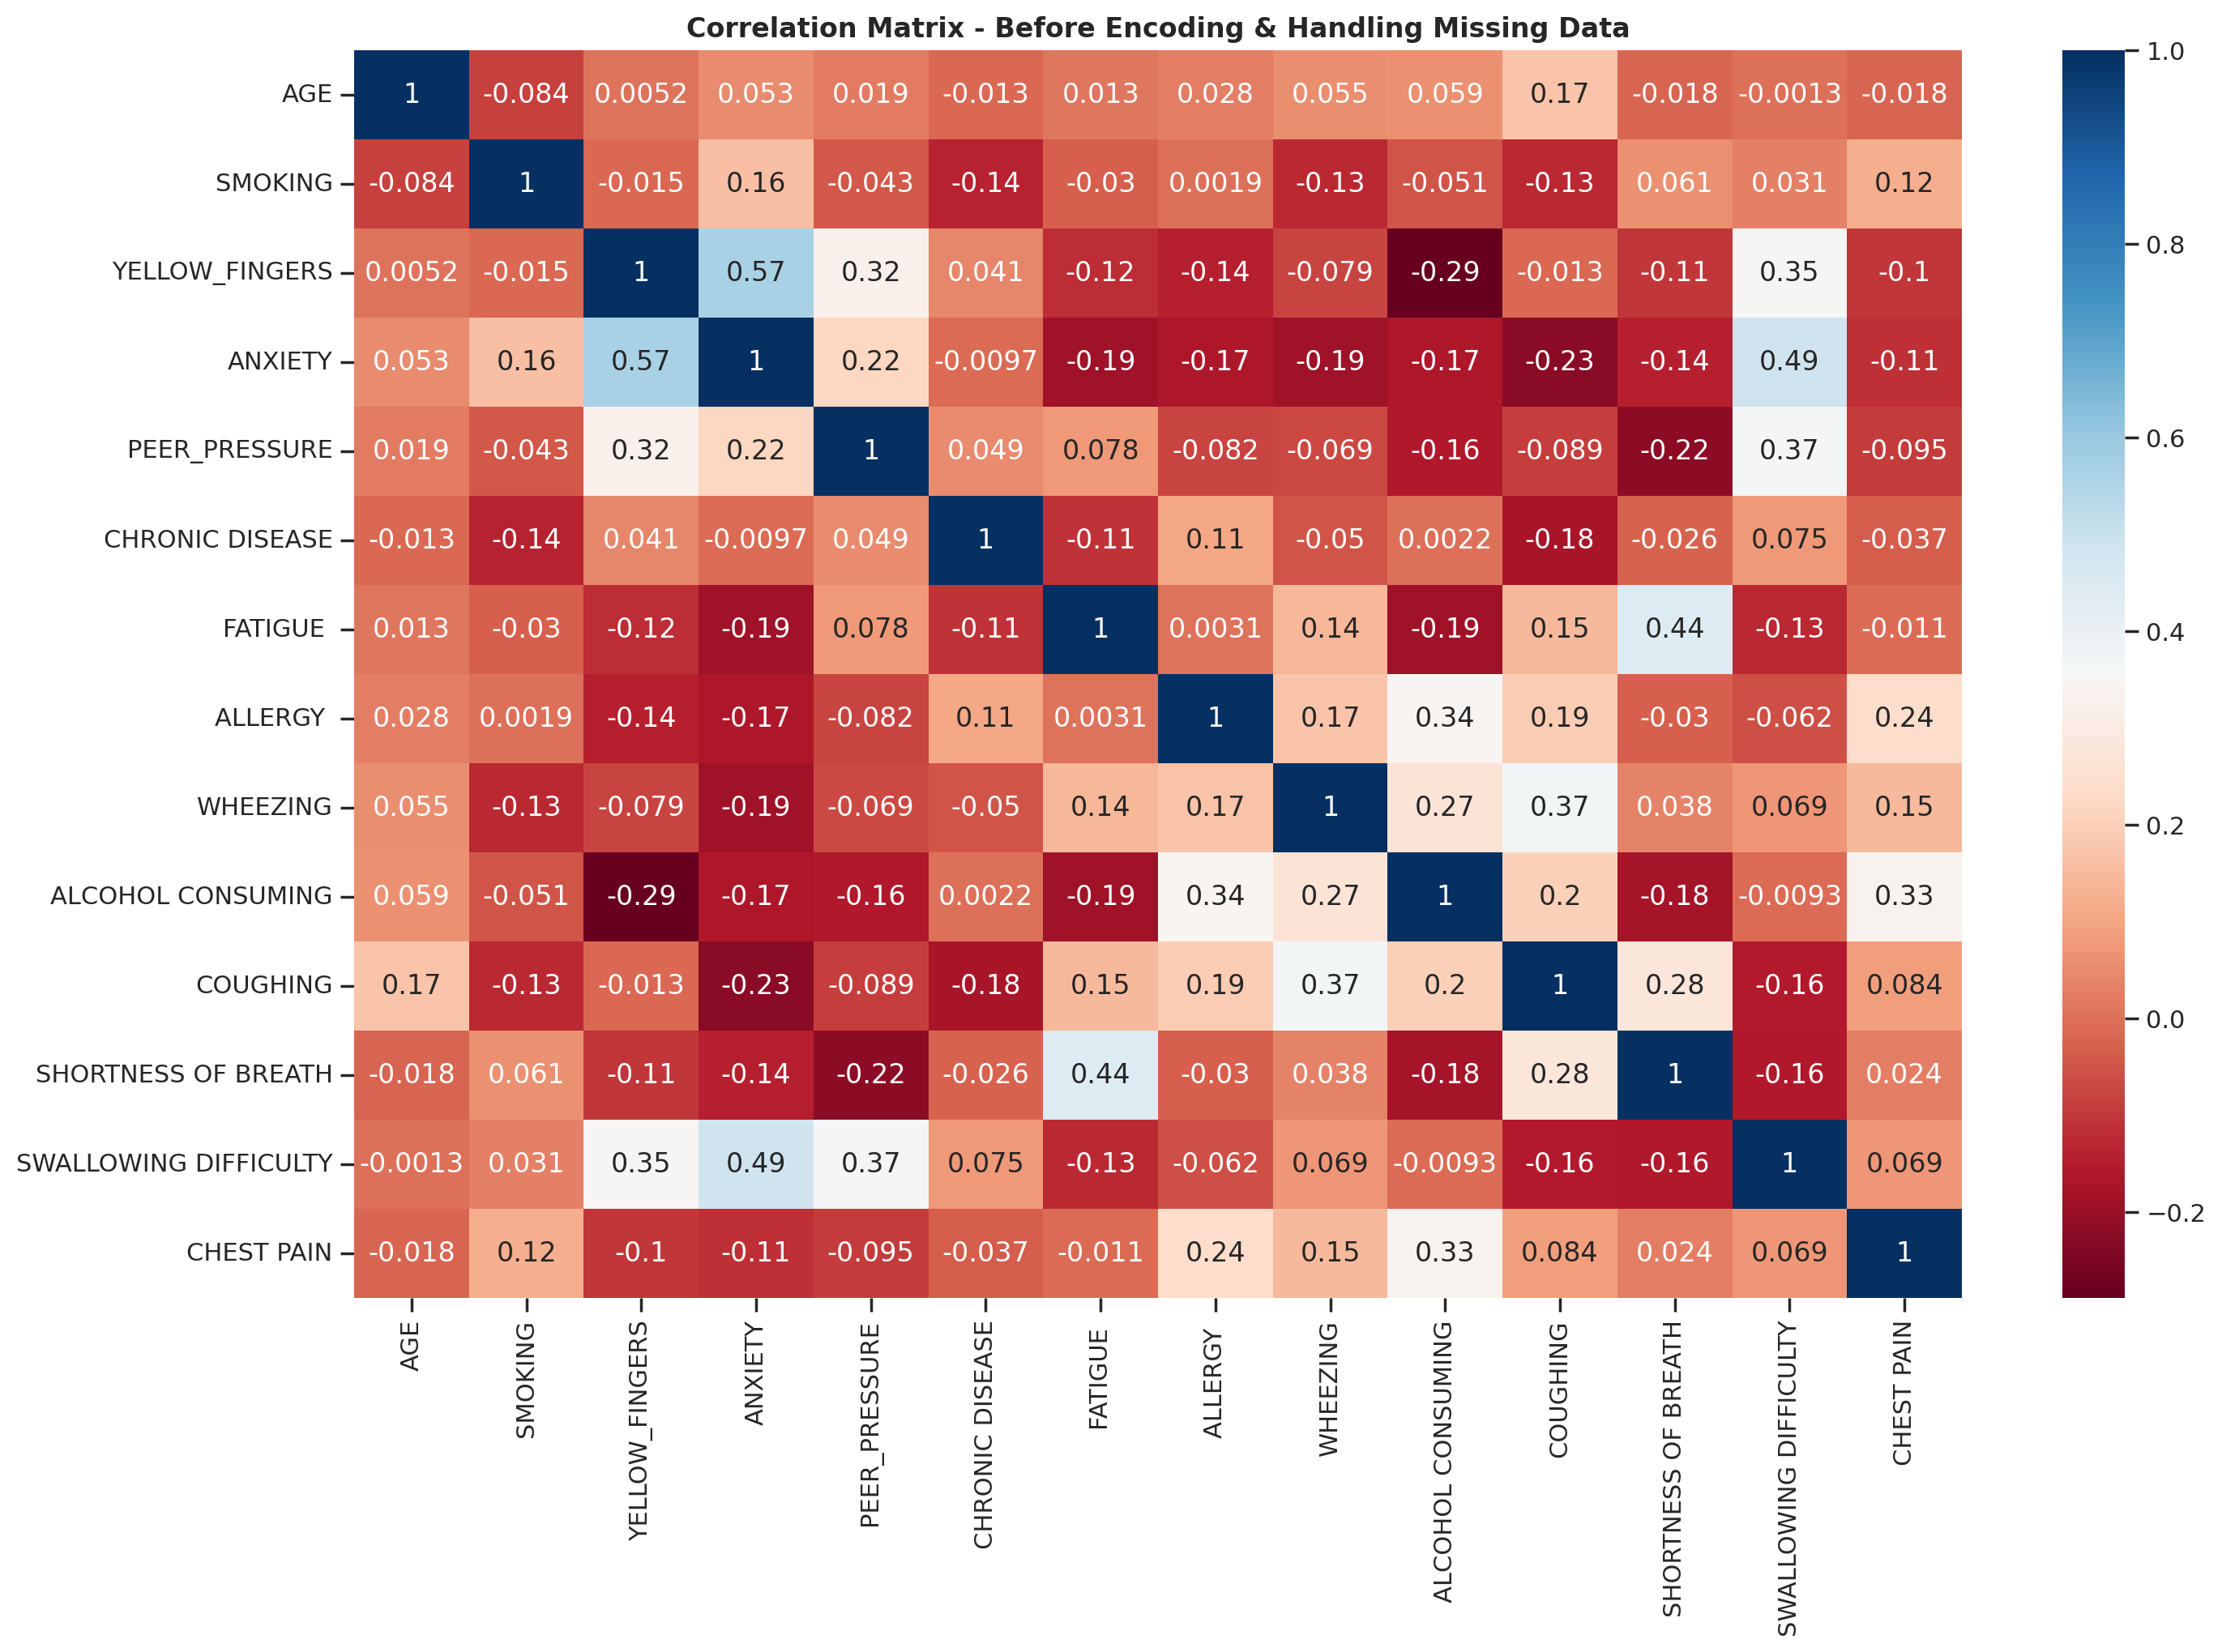

In [26]:
plt.figure(figsize = (16,10), dpi=200)
ax = plt.axes()
sns.heatmap(df.corr(), annot = True, cmap='RdBu', ax=ax)
ax.set_title('Correlation Matrix - Before Encoding & Handling Missing Data', weight='bold')
plt.show()

### Detecting Outliers

In [27]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(df_clean)

In [28]:
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

#threshold
threshold2 = -1.5
filtre2 = outlier_score["score"] < threshold2
outlier_index = outlier_score[filtre2].index.tolist()

In [29]:
len(outlier_index)

6

In [30]:
df_clean = df.copy()

### Feature Selection

In [31]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
categorical_cols = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
                    'CHRONIC DISEASE', 'WHEEZING', 'ALCOHOL CONSUMING',
                    'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Separate features and target variable
X = df.drop(['LUNG_CANCER', 'AGE'], axis=1)  # Exclude 'AGE' column
y = df['LUNG_CANCER']

# Initialize logistic regression model
logreg = LogisticRegression()

# Perform Recursive Feature Elimination
rfe = RFE(estimator=logreg, n_features_to_select=3)
X_rfe = rfe.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[rfe.support_].tolist()
print("Selected Features:", selected_features)


Selected Features: ['YELLOW_FINGERS', 'ALLERGY ', 'ALCOHOL CONSUMING']


In [32]:
g = df_clean.groupby('LUNG_CANCER')
df_balanced = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
df_balanced = df_balanced.reset_index(drop=True)
x = df_balanced[['YELLOW_FINGERS', 'ALLERGY ', 'ALCOHOL CONSUMING']]
y = df_balanced['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

In [33]:
x

,YELLOW_FINGERS,ALLERGY,ALCOHOL CONSUMING
0,1,1,1
1,2,1,1
2,2,1,1
3,1,1,1
4,1,1,1
...,...,...,...
73,2,2,2
74,2,2,2
75,2,2,2
76,2,2,2


In [34]:
y

0     0
1     0
2     0
3     0
4     0
     ..
73    1
74    1
75    1
76    1
77    1
Name: LUNG_CANCER, Length: 78, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state = 42, shuffle=True)

### Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
r_forest = RandomForestClassifier(criterion = 'entropy', max_depth = 20, n_estimators = 10000)
r_forest.fit(x_train,y_train)
predicted = r_forest.predict(x_test)
score = r_forest.score(x_test, y_test)
rf_score_ = np.mean(score)

print('Accuracy : %.3f' % (rf_score_))

Accuracy : 0.750


### Logistic Regression

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logmodel= LogisticRegression()
logmodel.fit(x_train,y_train)

predictions=logmodel.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.86      0.75      0.80        16

    accuracy                           0.81        32
   macro avg       0.82      0.81      0.81        32
weighted avg       0.82      0.81      0.81        32



### Deep Learning

In [39]:
from tensorflow.keras.layers import Conv1D, Dense, Input, MaxPooling1D, Dropout, Flatten
from tensorflow.keras.models import Sequential


model_cnn = Sequential()

#model_cnn.add(Conv1D(32, kernel_size=3, padding='same', activation='relu', input_shape=(16, 1)))
#model_cnn.add(MaxPooling1D(pool_size=2))

#model_cnn.add(Conv1D(64, kernel_size=3, padding='same', activation='relu'))
#model_cnn.add(MaxPooling1D(pool_size=2))

#model_cnn.add(Conv1D(32, kernel_size=3, padding='same', activation='relu'))
#model_cnn.add(MaxPooling1D(pool_size=2))

#model_cnn.add(Dropout(0.25))
#model_cnn.add(Flatten())
#model_cnn.add(Dense(16, activation='relu'))

#model_cnn.add(Dense(5, activation='softmax'))

model_cnn.add(Dense(3, activation='relu'))
model_cnn.add(Dense(10, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))

model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

#model_cnn.build(input_shape=[3])

In [40]:
import tensorflow as tf
from tensorflow import keras
#es=tf.keras.callbacks.EarlyStopping(
#    min_delta=0.001,
#    patience=10,
#    restore_best_weights=True
#)
h_cnn = model_cnn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)
model_cnn.summary()

Epoch 1/20
2/2 [==============================] - 2s 264ms/step - loss: 0.6911 - accuracy: 0.5435 - val_loss: 0.6965 - val_accuracy: 0.6250
Epoch 2/20
2/2 [==============================] - 0s 35ms/step - loss: 0.6911 - accuracy: 0.5217 - val_loss: 0.6965 - val_accuracy: 0.5000
Epoch 3/20
2/2 [==============================] - 0s 32ms/step - loss: 0.6910 - accuracy: 0.5435 - val_loss: 0.6965 - val_accuracy: 0.6250
Epoch 4/20
2/2 [==============================] - 0s 33ms/step - loss: 0.6910 - accuracy: 0.6304 - val_loss: 0.6965 - val_accuracy: 0.6250
Epoch 5/20
2/2 [==============================] - 0s 34ms/step - loss: 0.6910 - accuracy: 0.6304 - val_loss: 0.6966 - val_accuracy: 0.6250
Epoch 6/20
2/2 [==============================] - 0s 35ms/step - loss: 0.6909 - accuracy: 0.6304 - val_loss: 0.6965 - val_accuracy: 0.6250
Epoch 7/20
2/2 [==============================] - 0s 35ms/step - loss: 0.6909 - accuracy: 0.6304 - val_loss: 0.6966 - val_accuracy: 0.6250
Epoch 8/20
2/2 [==========

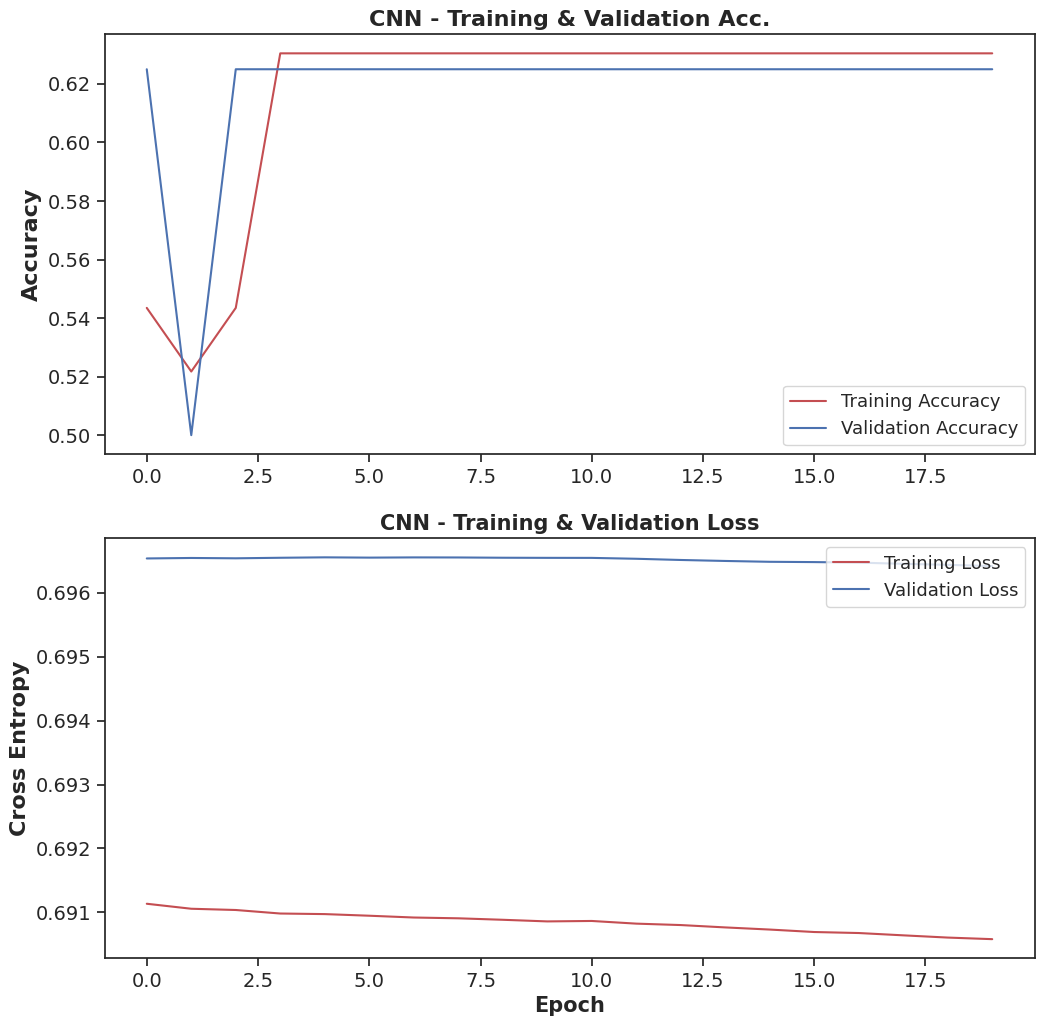

In [41]:
acc = h_cnn.history['accuracy']
val_acc = h_cnn.history['val_accuracy']

loss = h_cnn.history['loss']
val_loss = h_cnn.history['val_loss']


plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy', color='r')
plt.plot(val_acc, label='Validation Accuracy', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.title('CNN - Training & Validation Acc.', fontsize=16, weight='bold')


plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('CNN - Training & Validation Loss', fontsize=15, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')

plt.show()

import tensorflow as tf
from tensorflow import keras
es=tf.keras.callbacks.EarlyStopping(
    min_delta=0.001,
    patience=10,
    restore_best_weights=True
)


In [42]:
from sklearn.metrics import classification_report

Y_pred = model_cnn.predict(x_test)
y_pred = np.round(Y_pred)

print(classification_report(y_test, y_pred))

1/1 [==============================] - 0s 107ms/step
              precision    recall  f1-score   support

           0       0.60      0.75      0.67        16
           1       0.67      0.50      0.57        16

    accuracy                           0.62        32
   macro avg       0.63      0.62      0.62        32
weighted avg       0.63      0.62      0.62        32



Normalized confusion matrix


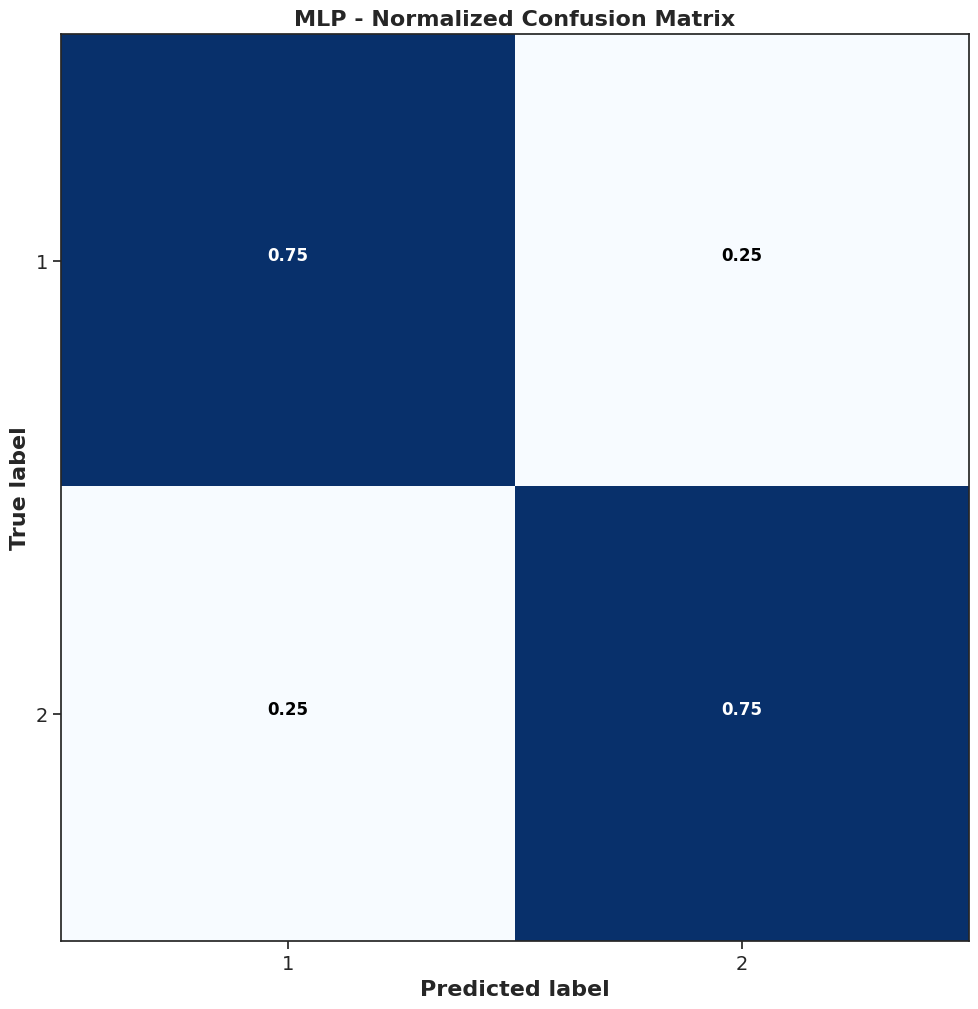

In [45]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, weight='bold', fontsize=16)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", fontsize=12, weight='bold',
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=16, weight='bold')
    plt.xlabel('Predicted label', fontsize=16, weight='bold')

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['1', '2'], normalize=True,
                      title='MLP - Normalized Confusion Matrix')
plt.grid(False)
plt.show()

In [47]:
from sklearn.metrics import classification_report

# Initialize the classifiers
svm = SVC()
knn = KNeighborsClassifier()
nb = GaussianNB()
dt = DecisionTreeClassifier()
gb = GradientBoostingClassifier()

# Train and evaluate the models
models = {'SVM': svm, 'KNN': knn, 'Naive Bayes': nb, 'Decision Tree': dt, 'Gradient Boosting': gb}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name}: Accuracy = {accuracy:.2f}')
    print(classification_report(y_test, y_pred))



SVM: Accuracy = 0.75
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        16
           1       0.75      0.75      0.75        16

    accuracy                           0.75        32
   macro avg       0.75      0.75      0.75        32
weighted avg       0.75      0.75      0.75        32

KNN: Accuracy = 0.75
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        16
           1       0.75      0.75      0.75        16

    accuracy                           0.75        32
   macro avg       0.75      0.75      0.75        32
weighted avg       0.75      0.75      0.75        32

Naive Bayes: Accuracy = 0.78
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        16
           1       0.76      0.81      0.79        16

    accuracy                           0.78        32
   macro avg       0.78      0.78      0.78        32
wei

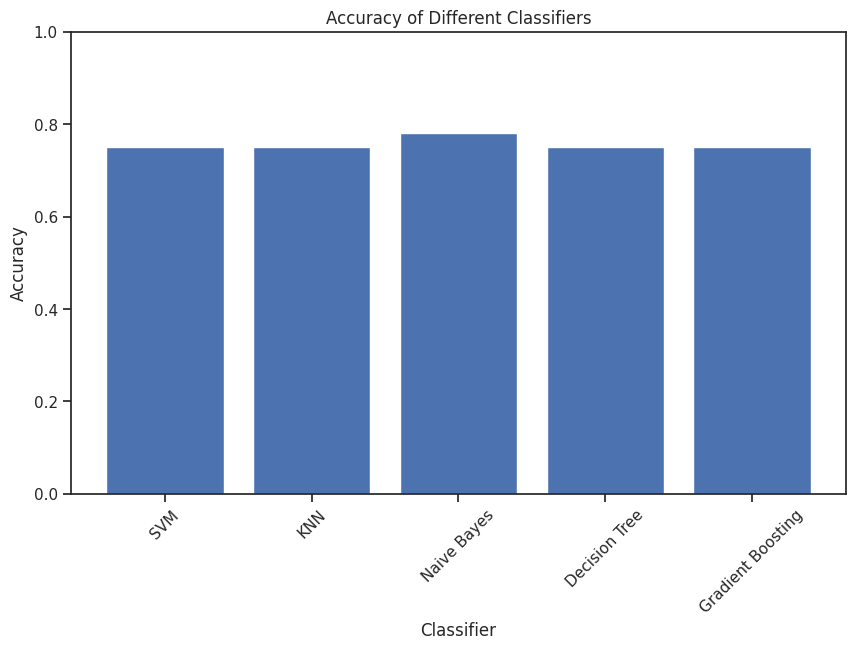

In [48]:
import matplotlib.pyplot as plt

# Initialize the classifiers
svm = SVC()
knn = KNeighborsClassifier()
nb = GaussianNB()
dt = DecisionTreeClassifier()
gb = GradientBoostingClassifier()

# Train and evaluate the models
models = {'SVM': svm, 'KNN': knn, 'Naive Bayes': nb, 'Decision Tree': dt, 'Gradient Boosting': gb}
accuracies = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracies)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.show()
